In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
N = 10000
inside = []
for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if np.sqrt(x**2 + y**2) < 1: 
        inside.append((x,y))

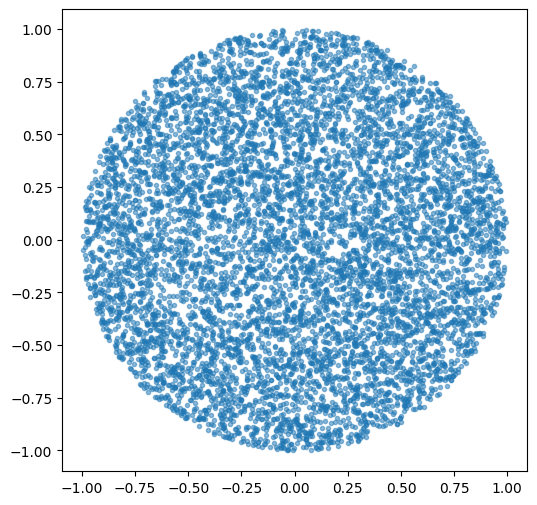

In [21]:
plt.figure(figsize=(6,6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker = '.', alpha = 0.5)

In [22]:
4 * len(inside)/float(N)

3.1452

In [25]:
N = 10000
inside = []
for i in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    z = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2 + z**2) < 1:
        inside.append((x, y, z))

# Volume of the cube is 8 (since it's from -1 to 1 in each dimension)
# Volume of the sphere is 4/3 * pi * r^3, here r = 1, so Volume = 4/3 * pi
# The ratio of the points inside the sphere to the total points will be:
# Volume of the sphere / Volume of the cube = (4/3 * pi * 1^3) / 8 = pi / 6

pi_estimate = 6 * len(inside) / float(N)
print(pi_estimate)


3.1476


In [27]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, z={self.z})"


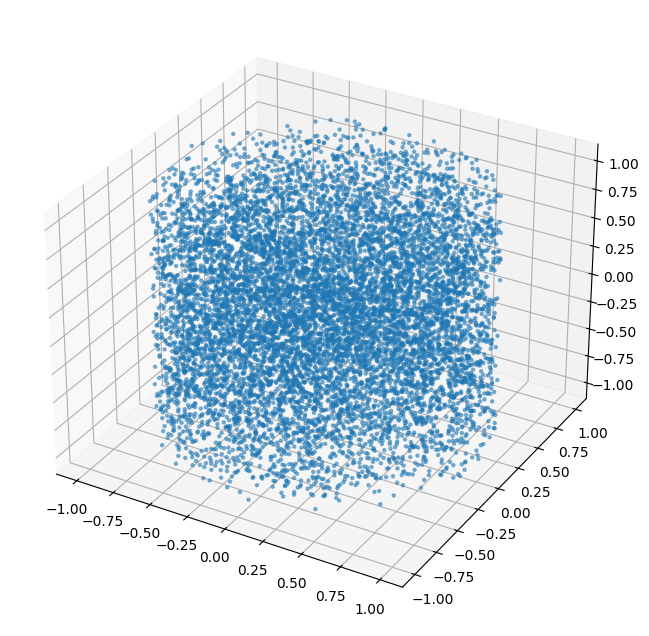

In [38]:
N = 10000
points = []

for p in range(N):
    r = np.sqrt(np.random.uniform(0, 1))
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.random.uniform(-1, 1)
    points.append(Point(x, y, z))

# Visualize points
xs = [p.x for p in points]
ys = [p.y for p in points]
zs = [p.z for p in points]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker='.', alpha=0.5)
plt.show()


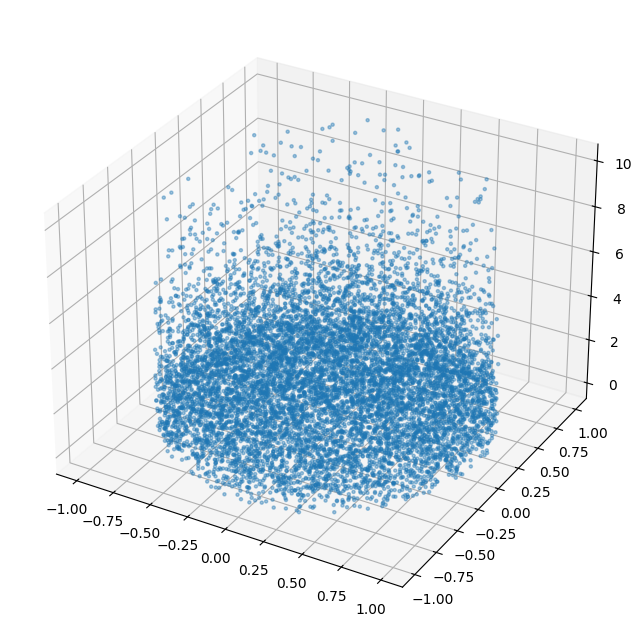

In [45]:
N = 10000
points = []
decay_rate = 2.0  # adjust the rate to control the decay

for _ in range(N):
    r = np.sqrt(np.random.uniform(0, 1))
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.random.uniform(0, 1)
    
    # apply exponential decay -- f(x) = le^(-lx) where l = 1/decayrate    
    z_weighted = np.random.exponential(scale=decay_rate) # range (0, 10)
    z_weighted = np.clip(z_weighted, 0, 10) # values less than 0 set to 0 and greater than 10 set to 10
    points.append(Point(x, y, z_weighted))

# model points with decay
xs = [p.x for p in points]
ys = [p.y for p in points]
zs = [p.z for p in points]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker='.', alpha=0.4)
plt.show()

In [3]:
def main():
    image_width = 256
    image_height = 256

    print("P3")
    print(image_width, image_height)
    print(255)

    for j in range(image_height-1, -1, -1):
        for i in range(image_width):
            r = i / (image_width - 1)
            g = j / (image_height - 1)
            b = 0.25

            ir = int(255.999 * r)
            ig = int(255.999 * g)
            ib = int(255.999 * b)

            #print(ir, ig, ib)

if __name__ == "__main__":
    main()


P3
256 256
255


In [9]:
import math

class Vec3:
    def __init__(self, e0=0.0, e1=0.0, e2=0.0):
        self.e = [e0, e1, e2]

    def x(self):
        return self.e[0]

    def y(self):
        return self.e[1]

    def z(self):
        return self.e[2]

    def __neg__(self):
        return Vec3(-self.e[0], -self.e[1], -self.e[2])

    def __getitem__(self, i):
        return self.e[i]

    def __setitem__(self, i, value):
        self.e[i] = value

    def __iadd__(self, other):
        self.e[0] += other.e[0]
        self.e[1] += other.e[1]
        self.e[2] += other.e[2]
        return self

    def __imul__(self, t):
        self.e[0] *= t
        self.e[1] *= t
        self.e[2] *= t
        return self

    def __itruediv__(self, t):
        return self.__imul__(1/t)

    def length(self):
        return math.sqrt(self.length_squared())

    def length_squared(self):
        return self.e[0]*self.e[0] + self.e[1]*self.e[1] + self.e[2]*self.e[2]

    def __repr__(self):
        return f"{self.e[0]} {self.e[1]} {self.e[2]}"

def dot(u, v):
    return u.e[0] * v.e[0] + u.e[1] * v.e[1] + u.e[2] * v.e[2]

def cross(u, v):
    return Vec3(u.e[1] * v.e[2] - u.e[2] * v.e[1],
                u.e[2] * v.e[0] - u.e[0] * v.e[2],
                u.e[0] * v.e[1] - u.e[1] * v.e[0])

def unit_vector(v):
    return v / v.length()

def vec3_add(u, v):
    return Vec3(u.e[0] + v.e[0], u.e[1] + v.e[1], u.e[2] + v.e[2])

def vec3_sub(u, v):
    return Vec3(u.e[0] - v.e[0], u.e[1] - v.e[1], u.e[2] - v.e[2])

def vec3_mul(u, v):
    return Vec3(u.e[0] * v.e[0], u.e[1] * v.e[1], u.e[2] * v.e[2])

def vec3_scale(v, t):
    return Vec3(t * v.e[0], t * v.e[1], t * v.e[2])

def vec3_div(v, t):
    return vec3_scale(v, 1/t)

Point3 = Vec3   # 3D point
Color = Vec3    # RGB color



In [10]:
from vec3 import Color

def write_color(out, pixel_color):
    out.write(f"{int(255.999 * pixel_color.x())} {int(255.999 * pixel_color.y())} {int(255.999 * pixel_color.z())}\n")



ModuleNotFoundError: No module named 'vec3'

In [11]:
from vec3 import Color
from color import write_color

def main():
    image_width = 256
    image_height = 256

    with open("image.ppm", "w") as f:
        f.write("P3\n")
        f.write(f"{image_width} {image_height}\n")
        f.write("255\n")

        for j in range(image_height-1, -1, -1):
            for i in range(image_width):
                pixel_color = Color(i / (image_width - 1), j / (image_height - 1), 0.25)
                write_color(f, pixel_color)

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'vec3'